In [1]:
#ISupport Vector Machine 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_squared_error



from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score



from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve   #expand on this in the write up 






In [2]:
dataset=pd.read_csv('parkinsons_updrs.data.csv')

In [3]:
dataset.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [4]:
dataset.drop(["motor_UPDRS"], axis=1, inplace=True)
dataset.drop('subject#', axis=1, inplace=True) # Remove Subject Num

In [5]:
dataset.head()

,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [6]:
y=dataset['total_UPDRS']

In [7]:
X=dataset.loc[:,dataset.columns!="total_UPDRS"]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [9]:
regressor = LinearRegression()

In [10]:
regressor.fit(X_train, y_train)


LinearRegression()

In [11]:
y_pred=regressor.predict(X_test)

In [12]:
Y_train_pred=regressor.predict(X_train)

In [13]:
y_pred

array([26.27834678, 30.87744875, 26.29420507, ..., 29.43834215,
       33.68883445, 35.33531138])

In [14]:
mse=mean_squared_error(y_test,y_pred)
mse

98.66907711285573

In [15]:
r2_score(y_train,Y_train_pred)*100

17.38742169479671

In [16]:
from math import sqrt

In [17]:
rms = sqrt(mse)
rms

9.933230950343184

In [18]:
predicted_value=y_pred
true_value=y_test

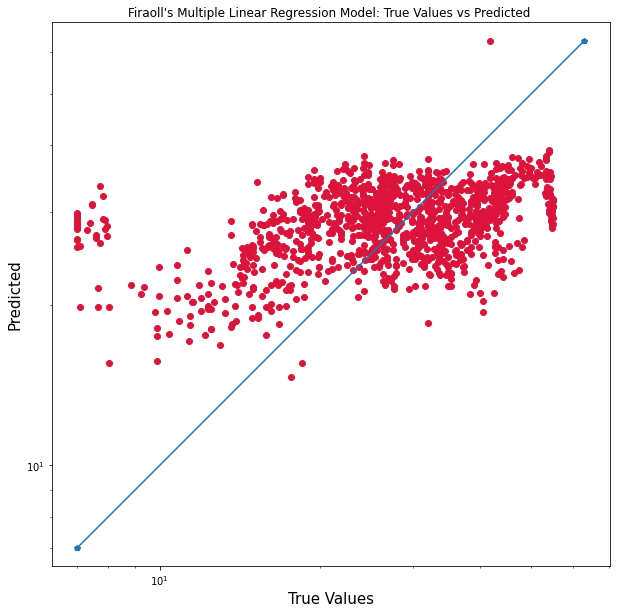

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'p-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Firaoll's Multiple Linear Regression Model: True Values vs Predicted ")
plt.axis('equal')
plt.show()

In [20]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_predicted_train = regressor.predict(X_train)
y_predicted_test =regressor.predict(X_test)

accuracy_train = r2_score(y_train, y_predicted_train)
print("Training Accuracy for ML ", accuracy_train*100)

accuracy_test = r2_score(y_test, y_predicted_test)
print("Testing Accuracy for ML: ", accuracy_test*100)

RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_predicted_train))
print("RMSE for Training ML: ", RMSE_MLR_train)

RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_predicted_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

Training Accuracy for ML  17.38742169479671
Testing Accuracy for ML:  18.330959321644748
RMSE for Training ML:  9.657163859935121
RMSE for Testing Data:  9.933230950343184
